In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv(url, names=columns)

# Display first 5 rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<ipython-input-3-91795dc92888>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Outcome"], palette="coolwarm")


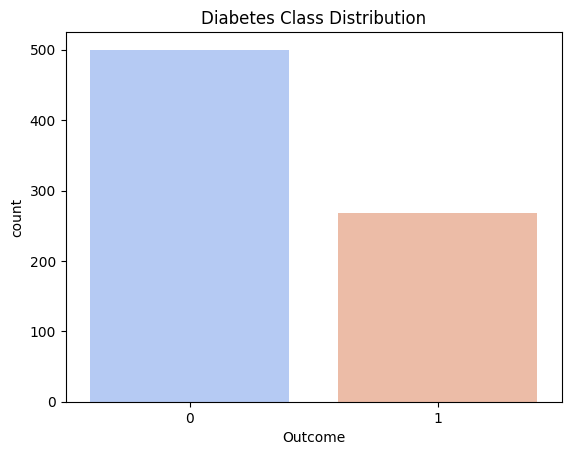

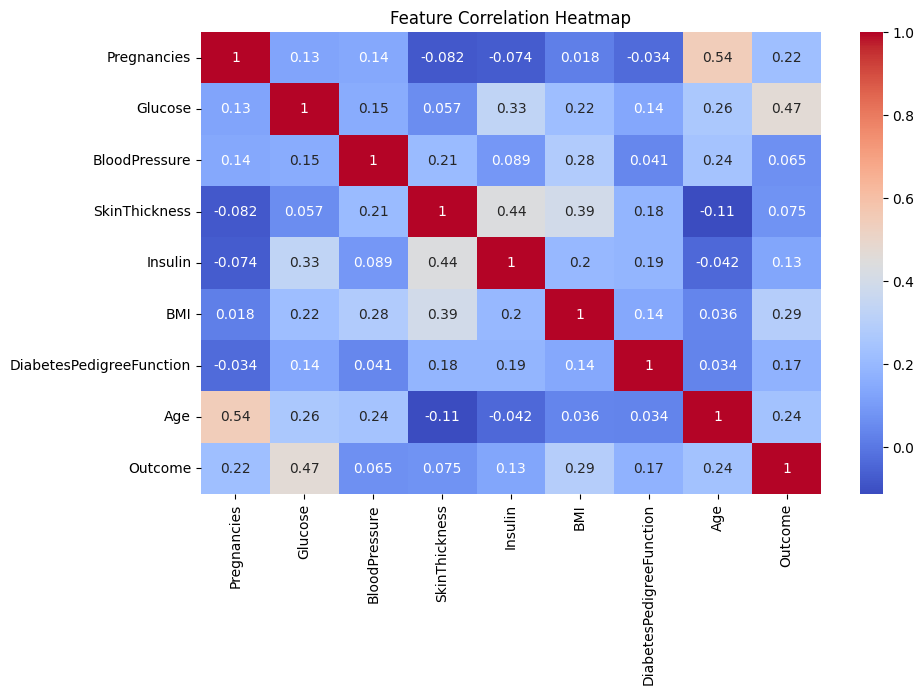

In [3]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

# Class distribution
sns.countplot(x=df["Outcome"], palette="coolwarm")
plt.title("Diabetes Class Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [4]:
# Split features and labels
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 614, Testing samples: 154


In [5]:
# Build the deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Prevent overfitting
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4128 - loss: 0.7207 - val_accuracy: 0.6883 - val_loss: 0.6702
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6725 - loss: 0.6594 - val_accuracy: 0.6753 - val_loss: 0.6276
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7186 - loss: 0.6166 - val_accuracy: 0.7078 - val_loss: 0.5751
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7210 - loss: 0.5694 - val_accuracy: 0.7143 - val_loss: 0.5306
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7530 - loss: 0.5187 - val_accuracy: 0.7273 - val_loss: 0.5048
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7631 - loss: 0.4826 - val_accuracy: 0.7078 - val_loss: 0.4949
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7535 - loss: 0.4878 - val_accuracy: 0.7208 - val_loss: 0.4854
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7512 - loss: 0.4988 - val_accuracy: 0.7143 - 

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7177 - loss: 0.5646 
Test Accuracy: 0.73


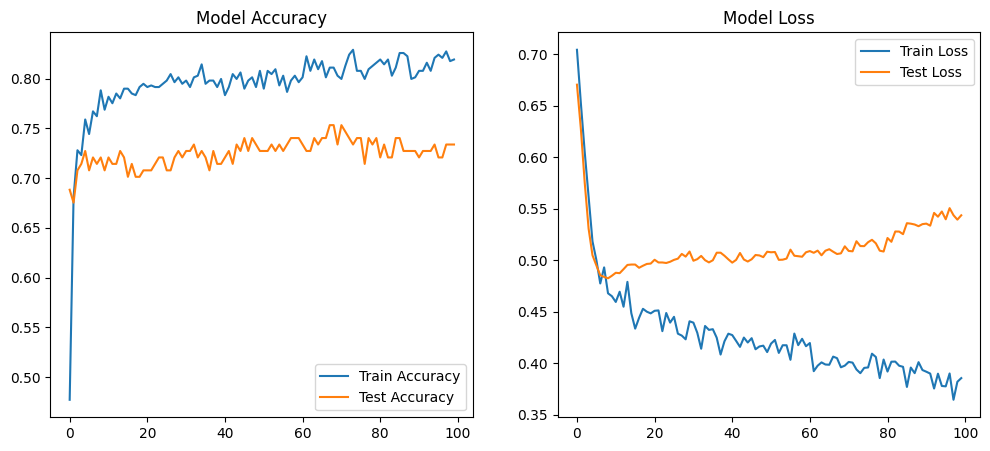

In [7]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Plot training history
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Test Accuracy")
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Test Loss")
plt.legend()
plt.title("Model Loss")

plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


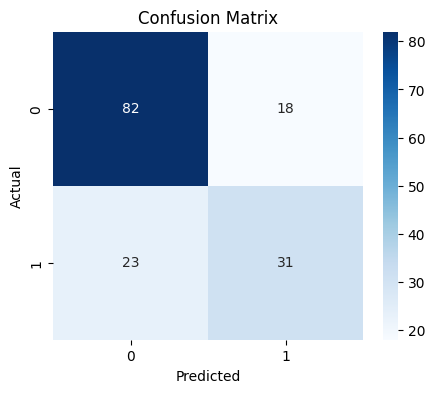


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       100
           1       0.63      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [8]:
# Predict test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [9]:
# Example input: (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age)
new_patient = np.array([[2, 130, 85, 23, 90, 28.1, 0.5, 45]])

# Scale the input
new_patient_scaled = scaler.transform(new_patient)

# Predict outcome
prediction = model.predict(new_patient_scaled)
result = "Diabetic" if prediction[0] > 0.5 else "Not Diabetic"
print("Prediction for new patient:", result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction for new patient: Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [10]:
# Save the trained model
model.save("diabetes_dnn_model.h5")

# Load the saved model
loaded_model = keras.models.load_model("diabetes_dnn_model.h5")

# Verify by predicting again
print("Loaded Model Prediction:", loaded_model.predict(new_patient_scaled))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Loaded Model Prediction: [[0.609504]]


In [11]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load model and scaler
model = keras.models.load_model("diabetes_dnn_model.h5")
scaler = joblib.load("scaler.pkl")

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    input_data = np.array(data["features"]).reshape(1, -1)
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    result = "Diabetic" if prediction[0] > 0.5 else "Not Diabetic"
    return jsonify({"prediction": result})

if __name__ == "__main__":
    app.run(debug=True)


FileNotFoundError: [Errno 2] No such file or directory: 'scaler.pkl'